In [1]:
from google.colab import drive
import os

drive.mount('/content/gdrive', force_remount=True)
os.chdir(r'/content/gdrive/MyDrive/Швы')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import zipfile
os.chdir(r'/content/gdrive/MyDrive/Швы')
with zipfile.ZipFile('test_dataset.zip', 'r') as zip_obj:
   # Extract all the contents of zip file in current directory
   os.chdir(r'/content/gdrive/MyDrive/Швы/Тест')
   zip_obj.extractall()

print('After zip extraction:')
print(os.listdir())

After zip extraction:
['0.jpg', '1 (1).jpg', '1 (101).jpg', '1 (102).jpg', '1 (103).jpg', '1 (104).jpg', '1 (107).jpg', '1 (108).jpg', '1 (109).jpg', '1 (110).jpg', '1 (13).jpg', '1 (14).jpg', '1 (19).jpg', '1 (2).jpg', '1 (20).jpg', '1 (25).jpg', '1 (26).jpg', '1 (27).jpg', '1 (28).jpg', '1 (31).jpg', '1 (32).jpg', '1 (35).jpg', '1 (36).jpg', '1 (39).jpg', '1 (4).jpg', '1 (40).jpg', '1 (43).jpg', '1 (44).jpg', '1 (47).jpg', '1 (48).jpg', '1 (51).jpg', '1 (52).jpg', '1 (55).jpg', '1 (56).jpg', '1 (59).jpg', '1 (60).jpg', '1 (63).jpg', '1 (64).jpg', '1 (67).jpg', '1 (68).jpg', '1 (7).jpg', '1 (71).jpg', '1 (72).jpg', '1 (75).jpg', '1 (76).jpg', '1 (79).jpg', '1 (8).jpg', '1 (80).jpg', '1 (83).jpg', '1 (84).jpg', '1 (87).jpg', '1 (88).jpg', '1 (89).jpg', '1 (90).jpg', '1 (91).jpg', '1 (92).jpg', '1 (93).jpg', '1 (94).jpg', '1 (95).jpg', '1 (96).jpg', '1 (97).jpg', '1 (98).jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg', '108.jpg', '1

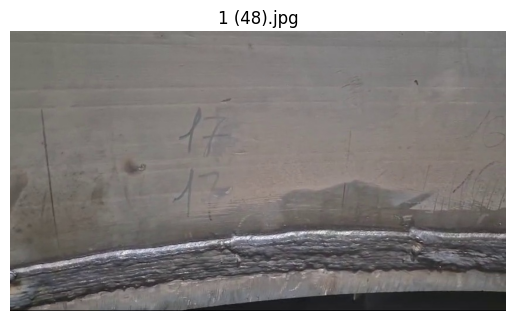

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil

# folder_path = '/content/drive/My Drive/Швы/Данные/NewFolder'

# # Проверка, что папка существует
# if os.path.exists(folder_path) and os.path.isdir(folder_path):
#     shutil.rmtree(folder_path)
#     print(f'Folder {folder_path} has been deleted.')
# else:
#     print(f'Folder {folder_path} does not exist or is not a directory.')

# Путь к папке с изображениями на Google Диске
# folder_path = '/content/drive/My Drive/Швы/Данные'

# Получаем список всех файлов в папке
os.chdir(r'/content/gdrive/MyDrive/Швы/Тест')

image_files = [f for f in os.listdir() if f.endswith(('.png', '.jpg', '.jpeg'))]
text_files = [f for f in os.listdir() if f.endswith('.txt')]

# Проверяем, что в папке есть хотя бы одно изображение
if image_files:
    # Выбираем первое изображение из списка
    first_image_file = image_files[29]

    # Полный путь к изображению
    # img_path = os.path.join('/content/drive/My Drive/Швы/Данные', first_image_file)

    # Чтение изображения
    img = mpimg.imread(first_image_file)

    # Отображение изображения
    plt.imshow(img)
    plt.axis('off')  # Отключаем отображение осей
    plt.title(first_image_file)
    plt.show()
else:
    print("В папке нет изображений.")


In [6]:
len(image_files)

363

In [8]:
import torch
from torchvision import transforms
from PIL import Image
import re


os.chdir(r'/content/gdrive/MyDrive/Швы/Тест')

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ColorJitter(0.6, 0.6, 0.3, 0.3),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

images_norm = []
for image_path in image_files:
    image = Image.open(re.sub(r'\.txt', '.jpg', image_path))
    image1 = transform(image)
    images_norm.append(image1)

images_norm = torch.stack(images_norm)

# Проверка формы тензора
print(images_norm.shape)

torch.Size([363, 3, 224, 224])


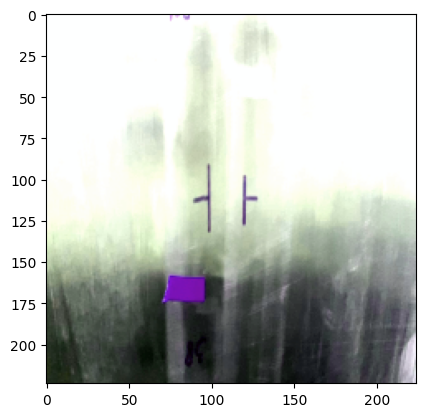

In [10]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
plt.imshow(images_norm[0].permute(1, 2, 0).numpy() * std + mean);

In [11]:
class net(torch.nn.Module):
    def __init__(self):
        super(net, self).__init__()
        self.batch_norm0 = torch.nn.BatchNorm1d(1024 * 2)

        self.fc_1= torch.nn.Linear(1024 * 2, 128 * 4)
        self.act_1=torch.nn.ELU()
        self.batch_norm1 = torch.nn.BatchNorm1d(128 * 4)

        self.fc_2 =torch.nn.Linear(128 * 4, 32 * 2)
        self.act_2=torch.nn.ELU()
        self.batch_norm2 = torch.nn.BatchNorm1d(32 * 2)

        # self.fc_3 =torch.nn.Linear(32 * 4, 32)
        # self.act_3=torch.nn.ELU()
        # self.batch_norm3 = torch.nn.BatchNorm1d(32)

        self.fc_4 = torch.nn.Linear(32 * 2, 2)

        self.sm = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = self.batch_norm0(x)
        x=self.fc_1(x)
        x=self.act_1(x)
        x = self.batch_norm1(x)

        x=self.fc_2(x)
        x=self.act_2(x)
        x = self.batch_norm2(x)

        # x=self.fc_3(x)
        # x=self.act_3(x)
        # x = self.batch_norm3(x)

        x = self.fc_4(x)
        return x

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x


In [13]:
os.chdir(r'/content/gdrive/MyDrive/Швы')
model1 = torch.load('my_resnet18.pt')
model2 = torch.load('my_googlenet.pt')
model3 = torch.load('my_densenet.pt')

/usr/local/lib/python3.10/dist-packages/torch/serialization.py:1006: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning)
  warnings.warn("'torch.load' received a zip file that looks like a TorchScript archive"


In [17]:
with torch.no_grad():
    y_pred1 = model1.forward(images_norm).argmax(dim=1)
    y_pred2 = model2.forward(images_norm).logits.argmax(dim=1)
    y_pred3 = model3.forward(images_norm).argmax(dim=1)
    y_pred = ((y_pred1 + y_pred2 + y_pred3) / 3 >= 0.5).to(torch.int)

code/__torch__/torchvision/models/googlenet.py:34: UserWarning: Scripted GoogleNet always returns GoogleNetOutputs Tuple


In [20]:
y_pred.sum()

tensor(273)

In [ ]:
len(image_files)

In [27]:
names_with_def = []

for i, j in zip(y_pred, image_files):
    if i == 1:
        names_with_def.append(j)

In [ ]:
names_with_def

In [30]:
os.chdir(r'/content/gdrive/MyDrive/Швы')
pd.DataFrame(names_with_def).to_csv('дефектные_швы.csv')

In [31]:
pd.DataFrame(names_with_def)

,0
0,0.jpg
1,1 (101).jpg
2,1 (102).jpg
3,1 (103).jpg
4,1 (104).jpg
...,...
268,93.jpg
269,94.jpg
270,95.jpg
271,96.jpg
